In [171]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [172]:
df = pd.read_csv('NetflixRawData.csv', lineterminator = '\n')

In [173]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [174]:
# viewing dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
        9837 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


Looks like our dataset has no NaNs. 
Overview, Original_Language and Poster-Url wouldn't be so useful during analysis.
Release_Date column needs to be casted into date time and to extract only the year value.

In [175]:
# exploring genres column
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

Genres are separated by commas followed by whitespaces

In [176]:
# check for duplicate rows
df.duplicated().sum()

0

Our dataset has no duplicated rows either.

In [177]:
# exploring summary statistics
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


-Exploration Summary

--We have a Dataframe consisting of 9837 rows and 9 columns.
--Our dataset looks a bit tidy with no NaNs or Duplicate Value.
--Release Date column needs to be casted into date time and we have to extract only year value.
--We have to change the datatype of Release Date to date time, Vote_count to integer, Vote_average to float.
--Overview, Original_Language and Poster-Url wouldnot be so useful during analysis,so we will drop it.
--There is noticable outliers in Popularity column.
--Vote_Average better be categorised for proper analysis.
--Genre Column has comma separated values and white spaces that needs to be handled and casted into category exploration summary.


# Data Cleaning 

Casting Release_Date column and extracting year values

In [178]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [180]:
# casting column a 
#df['Release_Date'] = pd.to_datetime(df['Release_Date'])
# confirming changes
#print(df['Release_Date'].dtypes)


# Option 3: For mixed formats, let pandas try to infer the format
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='mixed', errors='coerce')

# confirming changes
print(df['Release_Date'].dtypes)

datetime64[ns]


In [181]:
# First convert the string dates to datetime objects
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%d-%m-%Y', errors='coerce')

# Then extract the year
df['Release_Date'] = df['Release_Date'].dt.year

# Check the data type
df['Release_Date'].dtypes

dtype('float64')

In [182]:
df['Release_Date'] = df['Release_Date'].astype('Int32')

df['Release_Date'].dtypes

Int32Dtype()

In [183]:
df['Vote_Count'].dtypes

df['Vote_Count'] = df['Vote_Count'].astype(str).str.replace(r'[^\d.]', '', regex=True)

df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')

df['Vote_Count'] = df['Vote_Count'].astype('Int64')

df['Vote_Count'].dtype

Int64Dtype()

In [184]:
df['Vote_Average'].dtype

df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

df['Vote_Average'].dtype

dtype('float64')

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   Int32  
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9826 non-null   Int64  
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
        9837 non-null   object 
dtypes: Int32(1), Int64(1), float64(2), object(5)
memory usage: 672.6+ KB


In [186]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url\r
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping the columns
Dropping Overview, Original_Language and Poster-Url

In [187]:
# making list of column to be dropped
cols = ['Overview', 'Original_Language', 'Poster_Url\r'] 

In [188]:
# Dropping columns and confirming changes
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [189]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


Categorizing Vote_Average column

we would replace the Vote_Average values and make 4 categories popular average below_avg not_popular to describe it more using categorize_col() function provided above.

In [190]:
def categorize_col(df, col, labels):
    # setting the edges to cut the column accordingly
    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges , labels = labels, duplicates = 'drop')
    return df

In [191]:
# define the labels for edges
labels = ['not_popular', 'below_avg', 'average', 'popular']

# categorize column based on labels and edges
categorize_col(df, 'Vote_Average', labels)

# confirming changes
df['Vote_Average'].unique() 

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [192]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [194]:
# exploring column
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [195]:
# dropping NaNs
df.dropna(inplace = True)

# confirming
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [196]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


# We will split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [198]:
# Split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')

# explode the lists
df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [199]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')

# confirming changes
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  Int32   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  Int64   
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: Int32(1), Int64(1), category(2), float64(1), object(1)
memory usage: 799.5+ KB


In [201]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

Now that our dataset is clean and tidy, we re left with a total of 6 columns and 25551 rows to dig into during our analysis

# Data Visualization 

Here, we'd use Matplotlib and seaborn for making some informative visuals to gain insights about our data

In [202]:
# setting up seaborn configurations
sns.set_style('whitegrid')

# Q1. What is the most frequent genre in the dataset ?

In [203]:
# showing stats. on genre column
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

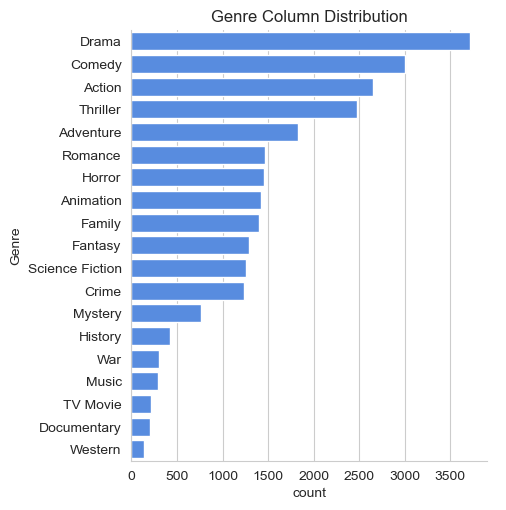

In [204]:
# visualizing genre column
sns.catplot(y = 'Genre', data = df, kind = 'count', order = df['Genre'].value_counts().index, color = '#4287f5')
plt.title('Genre Column Distribution')
plt.show()

We can notice from the above visual that 'Drama' genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

# Q2. What Genres has the highest votes?

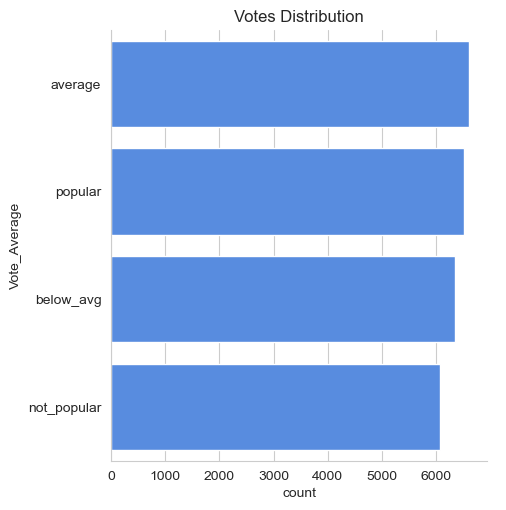

In [207]:
# Visualizing Vote_Average column
sns.catplot(y = 'Vote_Average', data = df, kind = 'count', order = df['Vote_Average'].value_counts().index, color = '#4287f5')
plt.title('Votes Distribution')
plt.show()

# Q3. Which movie got the highest popularity? What's its genre ?

In [208]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# Q4. Which movie got the lowest popularity? what's its genre?

In [209]:
# checking min popularity in dataset
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152,average,History
25548,1984,Threads,13.354,186,popular,War
25549,1984,Threads,13.354,186,popular,Drama
25550,1984,Threads,13.354,186,popular,Science Fiction


# Q5. Which year has the most filmmed movies?

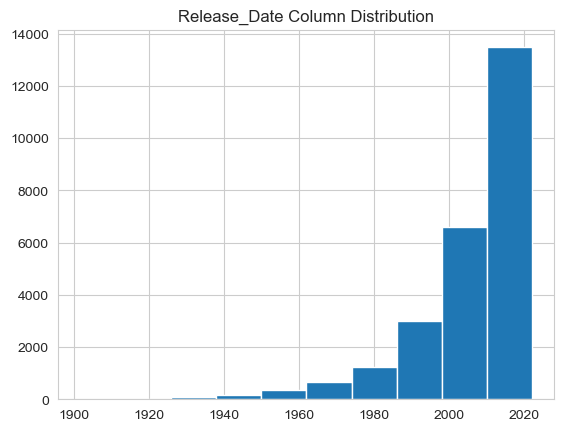

In [210]:
df['Release_Date'].hist()
plt.title('Release_Date Column Distribution')
plt.show()